In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import scipy.stats as stats  

In [17]:
df = pd.read_excel('Sales_Data.xlsx')

In [18]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [20]:
numerics = ['int64', 'float64']
newdf = df.select_dtypes(include=numerics)

In [21]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 6   MSRP                  2747 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 150.4 KB


In [22]:
newdf.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
0,10107,30,95.70,2,2871.00,828,95
1,10121,34,81.35,5,2765.90,757,95
2,10134,41,94.74,2,3884.34,703,95
3,10145,45,83.26,6,3746.70,649,95
4,10168,36,96.66,1,3479.76,586,95


In [5]:
df.shape

(2747, 20)

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [7]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [8]:
df.duplicated().sum() 

0

In [11]:
df[df.QUANTITYORDERED >=70].sort_values(by='QUANTITYORDERED',ascending=False).head(15)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
399,10405,97,93.280000,5,9048.16,43935,447,Shipped,Classic Cars,115,S12_4675,Mini Caravy,88.60.1555,"24, place Kluber",Strasbourg,67000,France,Citeaux,Frederique,Large
2511,10401,85,88.750000,10,7543.75,43924,2570,On Hold,Planes,99,S700_2466,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Large
2614,10401,77,92.000000,9,7084.00,43924,2673,On Hold,Planes,80,S700_3167,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Large
571,10407,76,185.300000,2,14082.80,43943,611,On Hold,Vintage Cars,170,S18_1749,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,94217,USA,Frick,Sue,Large
1656,10407,76,94.500000,6,7182.00,43943,1696,On Hold,Classic Cars,90,S24_2766,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,94217,USA,Frick,Sue,Large
1930,10405,76,154.469737,3,11739.70,43935,1978,Shipped,Classic Cars,140,S24_3856,Mini Caravy,88.60.1555,"24, place Kluber",Strasbourg,67000,France,Citeaux,Frederique,Large
1609,10412,70,121.400000,10,8498.00,43954,1638,Shipped,Trucks and Buses,127,S24_2300,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Large
1931,10419,70,132.000000,8,9240.00,43968,1946,Shipped,Classic Cars,140,S24_3856,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,5020,Austria,Pipps,Georg,Large


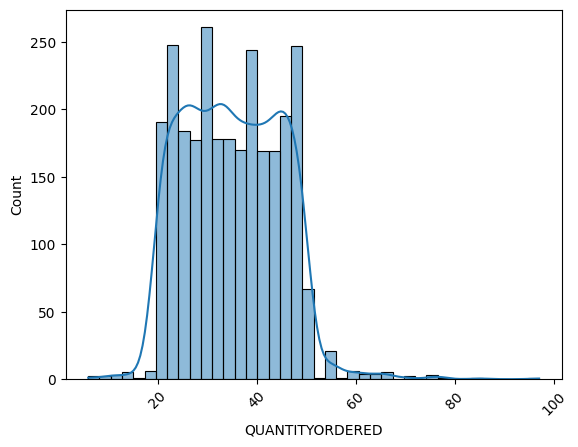

In [8]:
sns.histplot(df['QUANTITYORDERED'], kde=True)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='QUANTITYORDERED'>

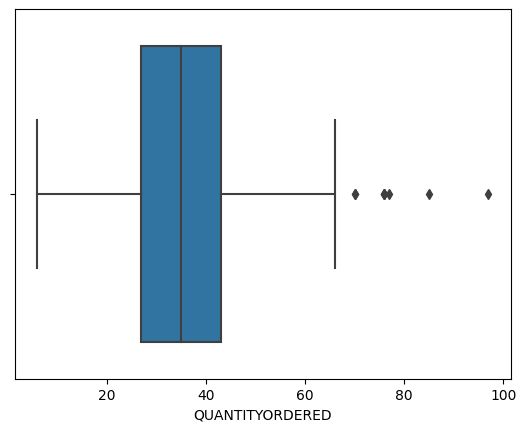

In [9]:
sns.boxplot(x='QUANTITYORDERED', data=df)

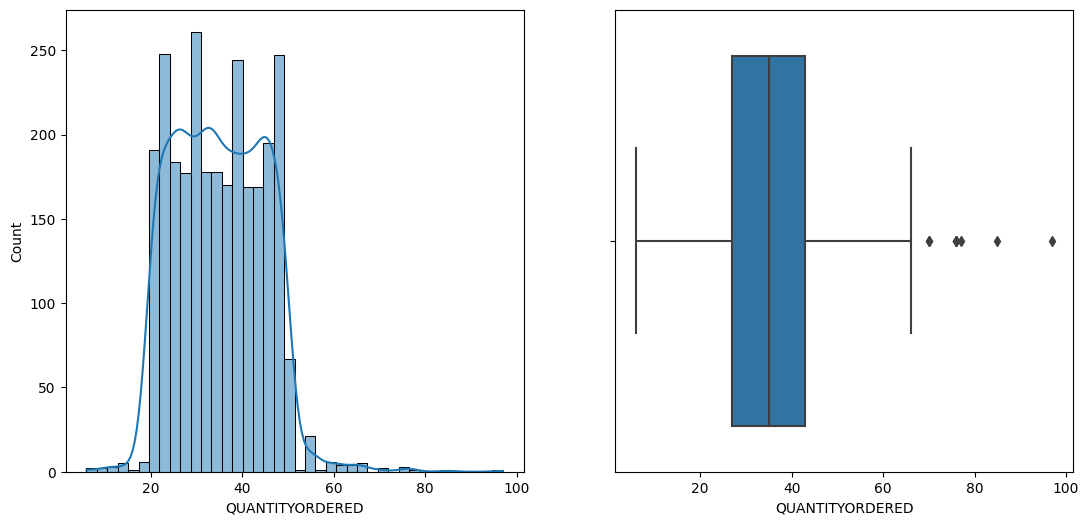

In [10]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['QUANTITYORDERED'], kde=True, ax=axes[0])
sns.boxplot(x='QUANTITYORDERED', data=df, ax=axes[1])
plt.show()

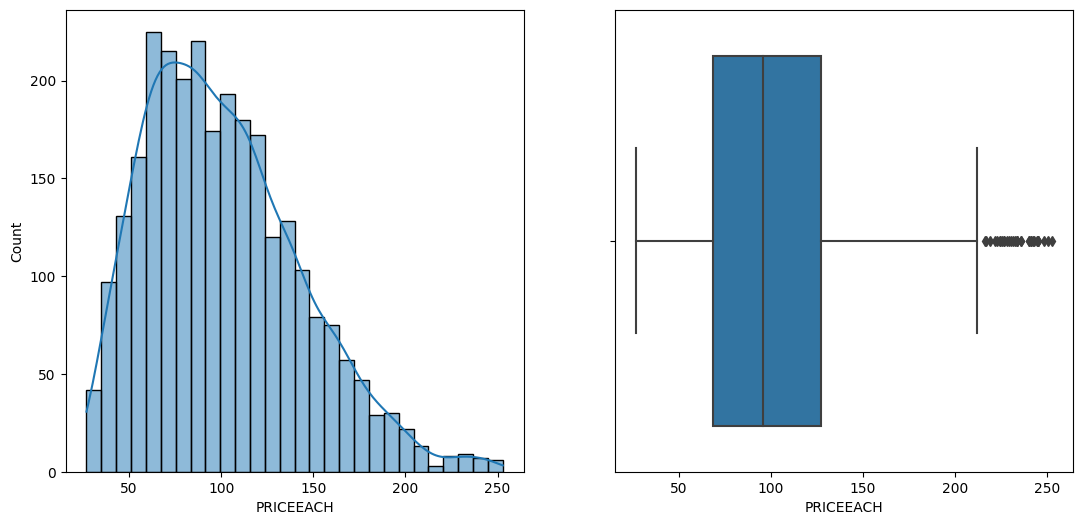

In [11]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['PRICEEACH'], kde=True, ax=axes[0])
sns.boxplot(x='PRICEEACH', data=df, ax=axes[1])
plt.show()

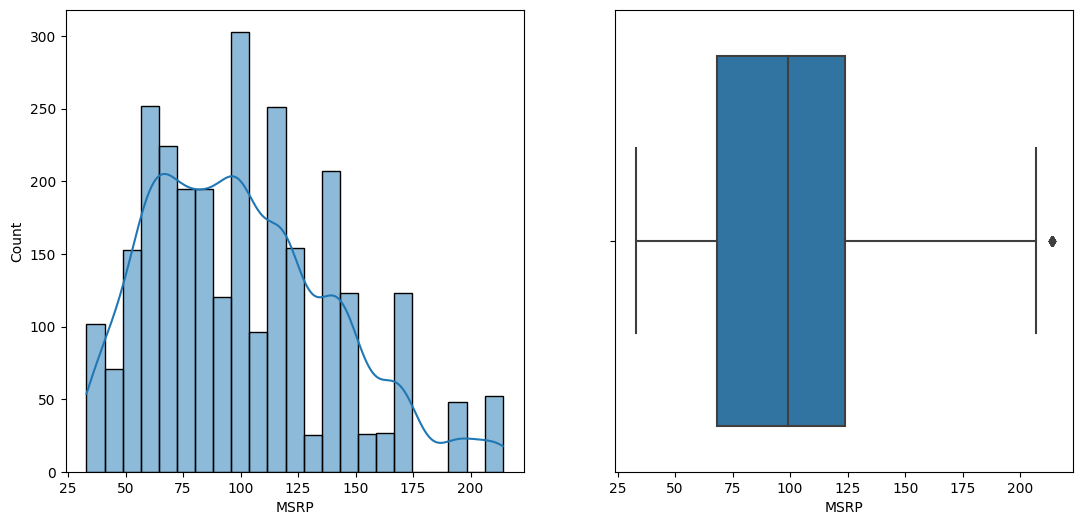

In [12]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['MSRP'], kde=True, ax=axes[0])
sns.boxplot(x='MSRP', data=df, ax=axes[1])
plt.show()

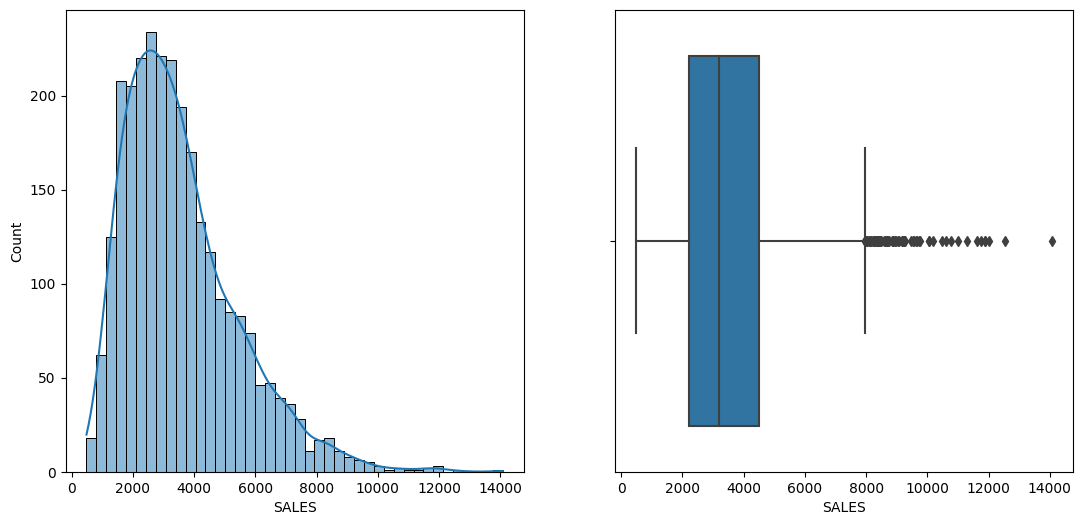

In [13]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['SALES'], kde=True, ax=axes[0])
sns.boxplot(x='SALES', data=df, ax=axes[1])
plt.show()

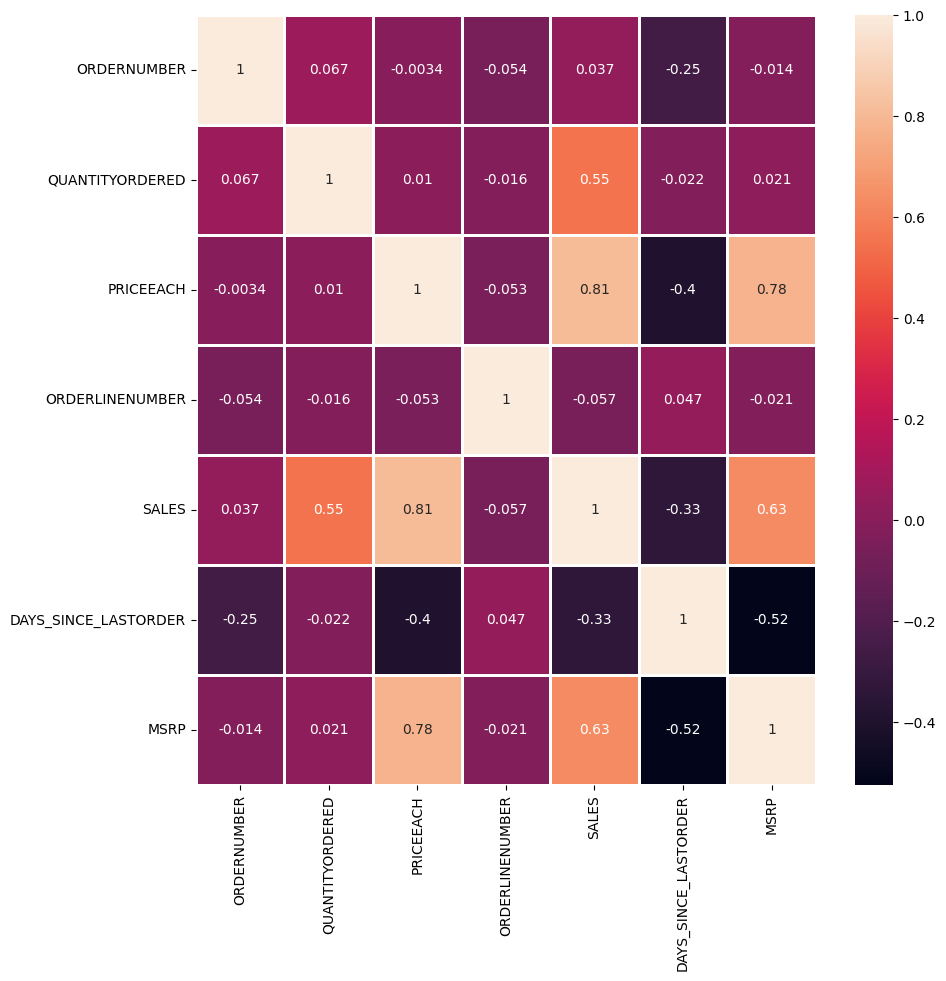

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(newdf.corr(), annot=True,linewidth = 1)